# 1. Informaci√≥n inicial

**Challenge Telecom X**

An√°lisis de evasi√≥n de clientes (Churn de clientes)

**Objetivo:**

Buscar, tratar y realizar un an√°lisis exploratorio de los datos de la empresa. Es decir, todo el proceso ETL.



# 2. Extracci√≥n

In [30]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2.1 Carga archivo json desde API

In [31]:
url = "https://raw.githubusercontent.com/Karen-13C/Challenge_Proceso_ETL/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)

telecom = response.json() 
telecom = pd.json_normalize(telecom, sep='_')
# Quita los prefijos: customer_, phone_, etc.
telecom.columns = [col.split('_')[-1] for col in telecom.columns]

df_telecom = pd.DataFrame(telecom)
df_telecom.head(5)

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Monthly    Total  
0              Yes      Mailed check    65.6    593.3  
1               No      Mailed check    59.9    542.4  
2              Yes  Electronic check    73.9   280.85  
3              Yes  Electronic check    98.0  1237.85  
4              Yes      Mailed check    83.9    267.4  

[5 rows x 21 columns]

## 2.2 Revisa nulos

In [32]:
df_telecom.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64

# 3. Transformaci√≥n

## 3.1 Tipos de datos del conjunto

### Diccionario de datos

- `customerID`: n√∫mero de identificaci√≥n √∫nico de cada cliente
- `Churn`: si el cliente dej√≥ o no la empresa
- `gender`: g√©nero (masculino y femenino)
- `SeniorCitizen`: informaci√≥n sobre si un cliente tiene o no una edad igual o mayor a 65 a√±os
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripci√≥n al servicio telef√≥nico
- `MultipleLines`: suscripci√≥n a m√°s de una l√≠nea telef√≥nica
- `InternetService`: suscripci√≥n a un proveedor de internet
- `OnlineSecurity`: suscripci√≥n adicional de seguridad en l√≠nea
- `OnlineBackup`: suscripci√≥n adicional de respaldo en l√≠nea
- `DeviceProtection`: suscripci√≥n adicional de protecci√≥n del dispositivo
- `TechSupport`: suscripci√≥n adicional de soporte t√©cnico, menor tiempo de espera
- `StreamingTV`: suscripci√≥n de televisi√≥n por cable
- `StreamingMovies`: suscripci√≥n de streaming de pel√≠culas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en l√≠nea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [33]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## 3.2 Conversi√≥n de columnas

### 3.2.1 Convertir columna ```Churn``` en bool

In [34]:
df_telecom['Churn'] = df_telecom['Churn'].map({'Yes':True, 'No':False}).astype(bool)
df_telecom['Churn'].dtypes

dtype('bool')

### 3.2.2 Convertir columna ```SeniorCitizen``` en bool

In [35]:
df_telecom['SeniorCitizen'] = df_telecom['SeniorCitizen'].map({0:False, 1:True}).astype(bool)
df_telecom['SeniorCitizen'].dtypes

dtype('bool')

### 3.2.3 Convertir el resto de columnas con yes, no en bool
```Partner, Dependents, PhoneService, MultipleLines, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling```

In [36]:
cols_a_Bool = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', \
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
df_telecom[cols_a_Bool] = df_telecom[cols_a_Bool].map(lambda x: True if x == 'Yes' else False).astype(bool)

### 3.2.4 Convertir columna ```Total``` en float

In [37]:
df_telecom['Total'] = pd.to_numeric(df_telecom['Total'], errors='coerce')
df_telecom['Total'].dtypes

dtype('float64')

## 3.3 Revisa si hay duplicados

In [38]:
df_telecom[df_telecom.duplicated()]

Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Monthly, Total]
Index: []

[0 rows x 21 columns]

No hay duplicados

## 3.4 Revisa si hay nulos

In [39]:
df_telecom.isnull().sum()

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Monthly              0
Total               11
dtype: int64

In [40]:
df_telecom[df_telecom['Total'].isnull()]

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
975   1371-DWPAZ  False  Female          False     True        True       0   
1775  2520-SGTTA  False  Female          False     True        True       0   
1955  2775-SEFEE  False    Male          False    False        True       0   
2075  2923-ARZLG  False    Male          False     True        True       0   
2232  3115-CZMZD  False    Male          False    False        True       0   
2308  3213-VVOLG  False    Male          False     True        True       0   
2930  4075-WKNIU  False  Female          False     True        True       0   
3134  4367-NUYAO  False    Male          False     True        True       0   
3203  4472-LVYGI  False  Female          False     True        True       0   
4169  5709-LVOEQ  False  Female          False     True        True       0   
5599  7644-OMVMY  False    Male          False     True        True       0   

      PhoneService  MultipleLines InternetService  ... OnlineBackup  \
975          False          False             DSL  ...         True   
1775          True          False              No  ...        False   
1955          True           True             DSL  ...         True   
2075          True          False              No  ...        False   
2232          True          False              No  ...        False   
2308          True           True              No  ...        False   
2930          True           True             DSL  ...         True   
3134          True           True              No  ...        False   
3203         False          False             DSL  ...        False   
4169          True          False             DSL  ...         True   
5599          True          False              No  ...        False   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
975               True         True         True            False  Two year   
1775             False        False        False            False  Two year   
1955             False         True        False            False  Two year   
2075             False        False        False            False  One year   
2232             False        False        False            False  Two year   
2308             False        False        False            False  Two year   
2930              True         True         True            False  Two year   
3134             False        False        False            False  Two year   
3203              True         True         True            False  Two year   
4169              True        False         True             True  Two year   
5599             False        False        False            False  Two year   

     PaperlessBilling              PaymentMethod Monthly  Total  
975             False    Credit card (automatic)   56.05    NaN  
1775            False               Mailed check   20.00    NaN  
1955             True  Bank transfer (automatic)   61.90    NaN  
2075             True               Mailed check   19.70    NaN  
2232            False               Mailed check   20.25    NaN  
2308            False               Mailed check   25.35    NaN  
2930            False               Mailed check   73.35    NaN  
3134            False               Mailed check   25.75    NaN  
3203             True  Bank transfer (automatic)   52.55    NaN  
4169            False               Mailed check   80.85    NaN  
5599            False               Mailed check   19.85    NaN  

[11 rows x 21 columns]

In [41]:
df_telecom.dropna(inplace=True)
df_telecom.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64

## 3.4 Creaci√≥n columna ```Cuentas_diarias```

In [42]:
df_telecom['Cuentas_diarias'] = round(df_telecom['Monthly']/30, 2)
df_telecom[['Monthly', 'Cuentas_diarias']]

Monthly  Cuentas_diarias
0       65.60             2.19
1       59.90             2.00
2       73.90             2.46
3       98.00             3.27
4       83.90             2.80
...       ...              ...
7262    55.15             1.84
7263    85.10             2.84
7264    50.30             1.68
7265    67.85             2.26
7266    59.00             1.97

[7256 rows x 2 columns]

# 4. Carga y an√°lisis

## 4.1 An√°lisis descriptivo

In [43]:
df_telecom.describe()

tenure      Monthly        Total  Cuentas_diarias
count  7256.000000  7256.000000  7256.000000      7256.000000
mean     32.395535    64.755423  2280.634213         2.158467
std      24.558067    30.125739  2268.632997         1.004282
min       1.000000    18.250000    18.800000         0.610000
25%       9.000000    35.450000   400.225000         1.180000
50%      29.000000    70.300000  1391.000000         2.340000
75%      55.000000    89.900000  3785.300000         3.000000
max      72.000000   118.750000  8684.800000         3.960000

## 4.2 Distribuci√≥n de evasi√≥n variables categ√≥ricas

En este paso, el objetivo es comprender c√≥mo est√° distribuida la variable "churn" (evasi√≥n) entre los clientes. Utiliza gr√°ficos para visualizar la proporci√≥n de clientes que permanecieron y los que se dieron de baja.

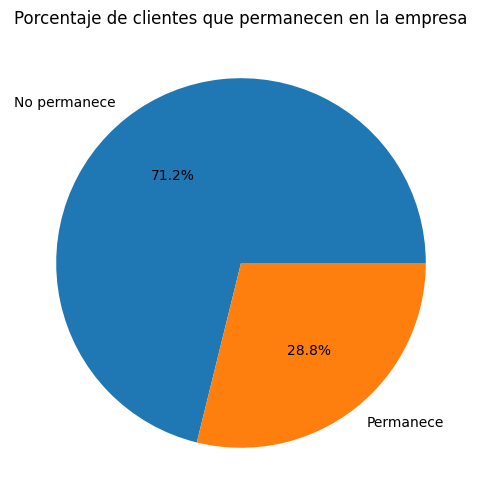

In [44]:
etiquetas = {True: 'Permanece', False: 'No permanece'}
col_Churn = df_telecom['Churn'].map(etiquetas)

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(col_Churn.value_counts(),labels=col_Churn.value_counts().index, autopct='%1.1f%%')

ax.set_title('Porcentaje de clientes que permanecen en la empresa')

plt.show()

### 4.2.1 Distribuci√≥n de evasi√≥n por g√©nero

In [45]:
col_Churn_genero = df_telecom.groupby('Churn')['gender'].value_counts()
col_Churn_genero

Churn  gender
False  Male      2619
       Female    2544
True   Male      1050
       Female    1043
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

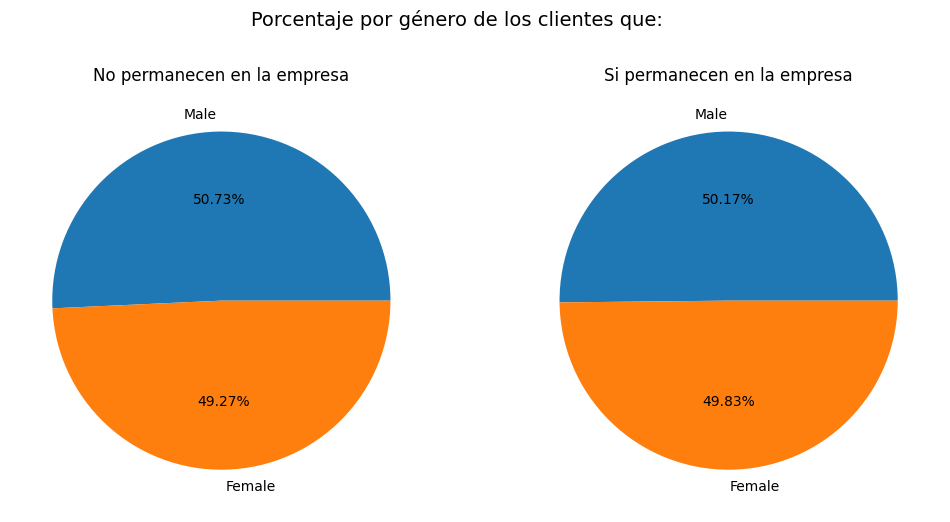

In [46]:
churn_false_data = col_Churn_genero.loc[False]
churn_true_data = col_Churn_genero.loc[True]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle('Porcentaje por g√©nero de los clientes que: ', fontsize=14)

ax[0].set_title('No permanecen en la empresa')
ax[0].pie(churn_false_data,labels=churn_false_data.index, autopct='%.2f%%')

ax[1].set_title('Si permanecen en la empresa')
ax[1].pie(churn_true_data, labels=churn_true_data.index, autopct='%.2f%%')

plt.show

### 4.2.2 Distribuci√≥n de evasi√≥n por ```tipo de contrato (Contract)```

In [47]:
col_churn_contrato = df_telecom.groupby('Contract')['Churn'].value_counts().unstack()
col_churn_contrato


Churn           False  True 
Contract                    
Month-to-month   2220   1785
One year         1306    212
Two year         1637     96

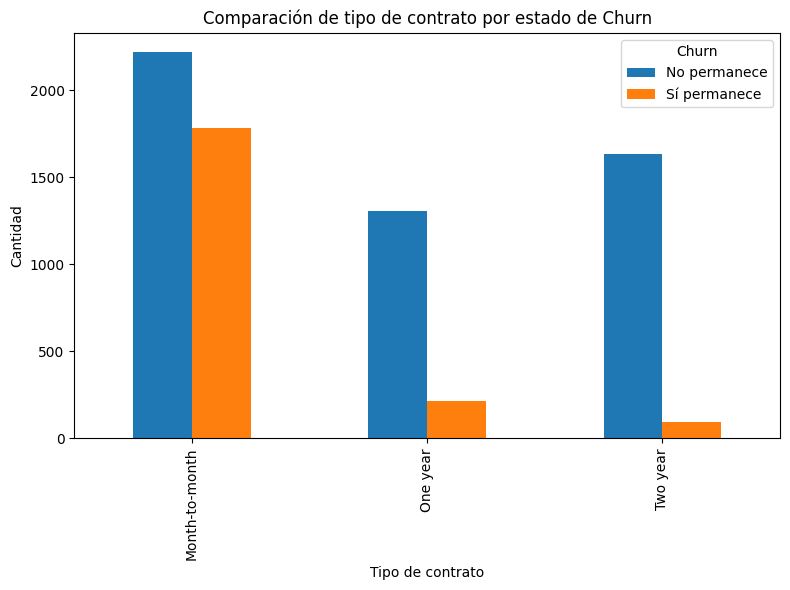

In [48]:
col_churn_contrato.plot(kind='bar', figsize=(8,6))

plt.title('Comparaci√≥n de tipo de contrato por estado de Churn')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad')
plt.legend(title='Churn', labels=['No permanece', 'S√≠ permanece'])
plt.tight_layout()
plt.show()

### 4.2.3 Distribuci√≥n de evasi√≥n por ```m√©todo de pago (PaymentMethod)```

In [49]:
col_churn_payment = df_telecom.groupby('PaymentMethod')['Churn'].value_counts().unstack()
col_churn_payment

Churn                      False  True 
PaymentMethod                          
Bank transfer (automatic)   1284    303
Credit card (automatic)     1289    278
Electronic check            1294   1151
Mailed check                1296    361

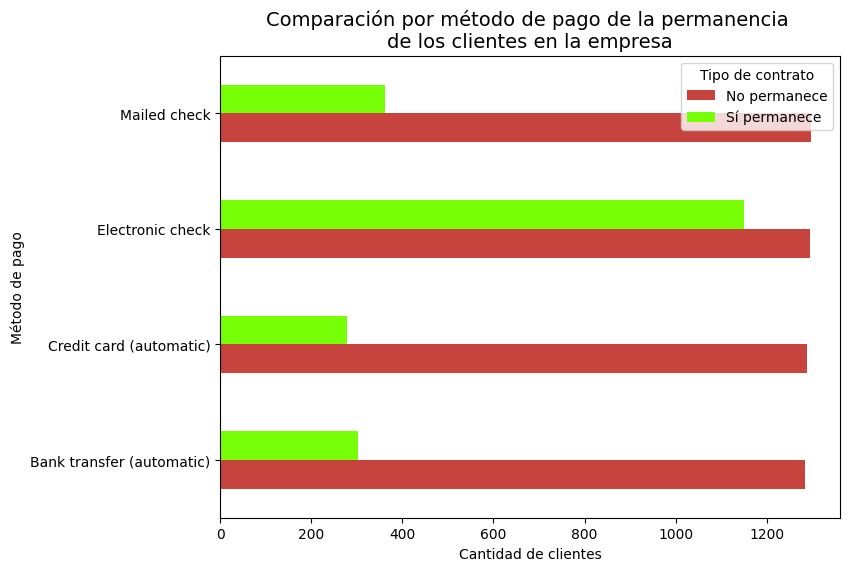

In [50]:
#colores = sns.color_palette('hls', n_colors=2)
colores = ["#c7433e", "#77ff08"]
col_churn_payment.plot(kind='barh', figsize=(8,6), color=[colores[0], colores[1]])

plt.title('Comparaci√≥n por m√©todo de pago de la permanencia \nde los clientes en la empresa', fontsize=14)
plt.ylabel('M√©todo de pago')
plt.xlabel('Cantidad de clientes')
plt.legend(title='Tipo de contrato', labels=('No permanece', 'S√≠ permanece'))

plt.show()

## 4.3 Distribuci√≥n de evasi√≥n variables num√©ricas

### 4.3.1 Distribuci√≥n de evasi√≥n por total gastado

In [51]:
# Crea rangos y etiquetas
bins = list(range(0, 10000, 1000))
labels = [f'{bins[i]}‚Äì{bins[i+1]-1}' for i in range(len(bins)-1)]

# Crea el dataframe con las columnas que requiero
churn_total = pd.DataFrame(df_telecom[['Churn', 'Total']])

# Crea columna extra de rangos
churn_total['rango'] = pd.cut(churn_total['Total'], bins=bins, labels=labels, right=False)

# Cuenta cu√°ntos valores hay en cada rango y los agrupa por churn
conteo_rangos = churn_total.groupby(['rango', 'Churn'], observed=True).size().unstack(fill_value=0)
conteo_rangos


Churn      False  True 
rango                  
0‚Äì999       1823   1170
1000‚Äì1999   1014    311
2000‚Äì2999    472    198
3000‚Äì3999    449    120
4000‚Äì4999    427     95
5000‚Äì5999    374     86
6000‚Äì6999    310     68
7000‚Äì7999    219     39
8000‚Äì8999     75      6

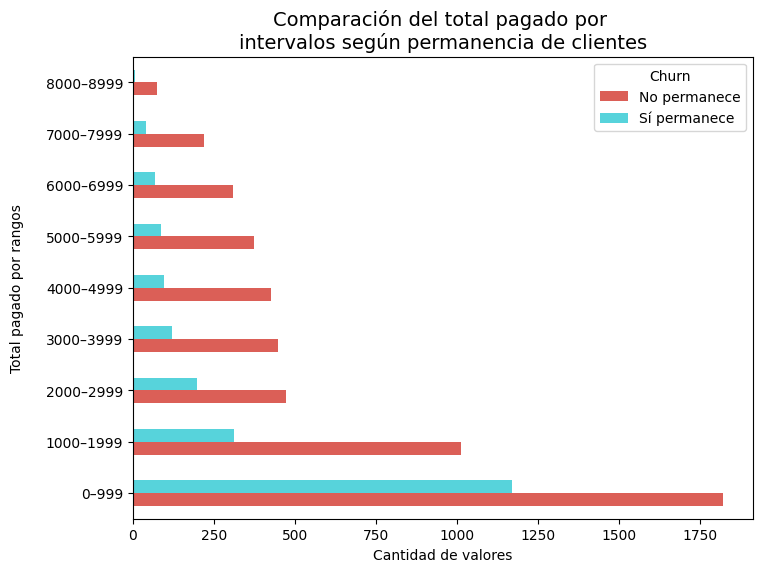

In [52]:
colores = sns.color_palette('hls', n_colors=2)
conteo_rangos.plot(kind='barh', figsize=(8,6), color=colores)

plt.title('Comparaci√≥n del total pagado por \nintervalos seg√∫n permanencia de clientes', fontsize=14)
plt.ylabel('Total pagado por rangos\n')
plt.xlabel('Cantidad de valores')
plt.legend(title='Churn', labels=('No permanece', 'S√≠ permanece'))

plt.show()

### 4.3.2 Distribuci√≥n de evasi√≥n por ```tiempo de contrato```

In [53]:
churn_tiempo_contrato = df_telecom[['Churn', 'tenure']]
churn_tiempo_contrato.groupby('Churn')['tenure'].value_counts()

Churn  tenure
False  72        356
       1         233
       71        164
       2         115
       70        108
                ... 
True   45          8
       62          8
       60          7
       64          7
       63          5
Name: count, Length: 144, dtype: int64

In [54]:
churn_tiempo_contrato.groupby(['Churn', 'tenure']).size()

Churn  tenure
False  1         233
       2         115
       3         106
       4          93
       5          69
                ... 
True   68         13
       69         13
       70         14
       71         12
       72         13
Length: 144, dtype: int64

In [55]:
churn_tiempo_contrato.groupby(['Churn', 'tenure']).size().unstack(0)

Churn   False  True 
tenure              
1         233    401
2         115    131
3         106    101
4          93     92
5          69     69
...       ...    ...
68         91     13
69         87     13
70        108     14
71        164     12
72        356     13

[72 rows x 2 columns]

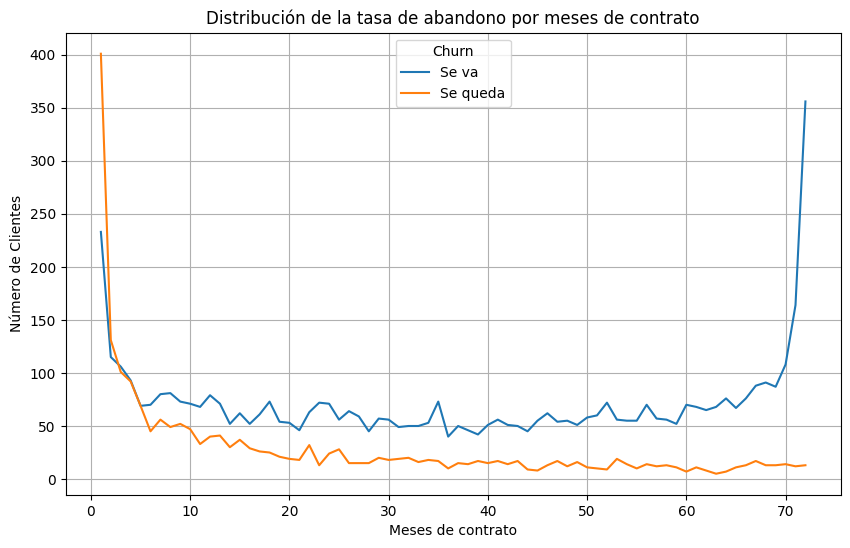

In [56]:
# Agrupa y cuenta
churn_tiempo_contrato = churn_tiempo_contrato.groupby(['Churn', 'tenure']).size().unstack(0).fillna(0)

# Ordena por tenure
churn_tiempo_contrato = churn_tiempo_contrato.sort_index()

churn_tiempo_contrato.plot(kind='line', figsize=(10,6))

plt.title('Distribuci√≥n de la tasa de abandono por meses de contrato')
plt.xlabel('Meses de contrato')
plt.ylabel('N√∫mero de Clientes')
plt.legend(title='Churn', labels=('Se va', 'Se queda'))
plt.grid(True)
plt.show()


# 5. Informe final

üîπ Introducci√≥n: Explica el objetivo del an√°lisis y el problema de evasi√≥n de clientes (Churn).

üîπ Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

üîπ An√°lisis Exploratorio de Datos: Presenta los an√°lisis realizados, incluyendo gr√°ficos y visualizaciones para identificar patrones.

üîπ Conclusiones e Insights: Resume los principales hallazgos y c√≥mo estos datos pueden ayudar a reducir la evasi√≥n.

üîπ Recomendaciones: Ofrece sugerencias estrat√©gicas basadas en tu an√°lisis.

## 5.1 Introducci√≥n

El **objetivo del an√°lisis** es saber si la cantidad de clientes que dejan la empresa es mayor a la cantidad de clientes que se quedan, as√≠ como el posible motivo por el que la dejan.

El **churn** puede ser definido como: "tasa de abandono".

**¬øPor qu√© se aborda el problema?**

Porque el prop√≥sito de toda empresa es crecer, colocarse en una buena posici√≥n en el mercado, por lo tanto el hecho de tener una tasa de abandono m√°s alta que la de permanencia es un problema que es necesario abordar lo m√°s pronto posible.

## 5.2 Limpieza y tratamiento de datos

Se ha **importado** desde la API  de github el archivo de datos, aunque por estar en la misma carpeta tambi√©n se puede importar con un read_json.

Luego se revisa si hay **valores nulos**, en apariencia no hab√≠an, pero luego al revisar con info se descubre que los datos est√°n en su mayor√≠a como object, lo cual no permite contabilizar de forma correcta si hay nulos por ser strings.

As√≠ que se procede a **convertir** las columnas a los tipos correspondientes, es decir las columnas con valores flotantes se convierten a flotantes, y otras columnas con strings pero de tipo 'yes', 'no' se convierten a booleanas para ser trabajadas m√°s facilmente.

Estos cambios permitieron saber que la columna de 'Total' contaba con 11 filas de **valores nulos**, por lo que se eliminaron porque no hab√≠a forma de verificar cuales eran los datos correctos, adem√°s se verific√≥ la columna de 'tenure' que corresponde a meses de contrato del cliente, y estaban en cero las 11 filas, por lo que se confirm√≥ la necesidad de eliminar dichas filas.

Y as√≠ concluy√≥ el proceso de limpieza y tratamiento de los datos.

## 5.3 An√°lisis exploratorio de los datos

### An√°lisis descriptivo

En el an√°lisis descriptivo se realiza un describe, que permite visualizar la siguiente tabla:

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>tenure</th>
      <th>Monthly</th>
      <th>Total</th>
      <th>Cuentas_diarias</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>7256.000000</td>
      <td>7256.000000</td>
      <td>7256.000000</td>
      <td>7256.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>32.395535</td>
      <td>64.755423</td>
      <td>2280.634213</td>
      <td>2.158467</td>
    </tr>
    <tr>
      <th>std</th>
      <td>24.558067</td>
      <td>30.125739</td>
      <td>2268.632997</td>
      <td>1.004282</td>
    </tr>
    <tr>
      <th>min</th>
      <td>1.000000</td>
      <td>18.250000</td>
      <td>18.800000</td>
      <td>0.610000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>9.000000</td>
      <td>35.450000</td>
      <td>400.225000</td>
      <td>1.180000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>29.000000</td>
      <td>70.300000</td>
      <td>1391.000000</td>
      <td>2.340000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>55.000000</td>
      <td>89.900000</td>
      <td>3785.300000</td>
      <td>3.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>72.000000</td>
      <td>118.750000</td>
      <td>8684.800000</td>
      <td>3.960000</td>
    </tr>
  </tbody>
</table>
</div>

El an√°lisis descriptivo solo trabaja sobre las columnas con valores num√©ricos, por lo que la fila **count** permite verificar que todas las columnas tienen la misma cantidad de datos 7256.

La fila **mean** corresponde al promedio o valor central en los datos, en el caso de:
1. tenure: en promedio el tiempo de contrato es de 32 meses.
2. Monthly: en promedio los clientes por mes pagan $64.7 por el total de todos los servicios contratados.
3. Total: en promedio el total gastado por los clientes desde que iniciaron sus contratos es de $2280.6
4. Cuentas_diarias: en promedio diariamente los clientes gastan $2.15 en sus servicios.

La fila **std** se refiere a la desviaci√≥n estandar, representa qu√© tanto se dispersan los valores con respecto al promedio. Para comprender mejor este dato se puede utilizar para calcular el **coeficiente de variaci√≥n (CV)** este nos ayudar√° a interpretar mejor la variabilidad.
1. Seg√∫n ```cv_tenure``` el coeficiente de variaci√≥n sobre los meses de contrato es de 75.8%, esto indica que: 
    * la empresa cuenta con clientes que contratan por muy poco tiempo, y otros por mucho tiempo. Al ser tan variable es m√°s dificil predecir el flujo de ingresos futuros. 
    * Tambi√©n puede se√±alar la necesidad de estrategias para la retenci√≥n, es decir: crear incentivos para la renovaci√≥n en contratos cortos, y en el caso de los contratos largo centrarse en el mantenimiento de la relaci√≥n.
    * Por lo que esta variabilidad podr√≠a estar relacionada con las altas tasas de abandono.
2. Seg√∫n ```cv_monthly``` la variaci√≥n del total de cargos mensuales del total de servicios del cliente es de 46.5%, veamos lo que eto significa:
    * Si se desea que la empresa se base en suscripciones fijas, ese 46% represetar√≠a que en realidad hay muchos cambios frecuentes en la contrataci√≥n.
    * Pero si se desea que la empresa se base en servicios por consumo ese porcentaje es lo esperado.
3. Seg√∫n ```cv_total``` la variabilidad del total gastado por el cliente es de 99.4%, por los valores anteriores es realmente esperable que sea un valor alto de variabilidad, pero analicemos lo que esto significa:
    * Sugiere que solo una peque√±a fracci√≥n de los clientes contribuye de forma desproporcional al total, es decir que estos son los clientes de alto valor ya que permencen en el tiempo.
    * Este valor confirma la necesidad de segmentaci√≥n y de estrategias de retenci√≥n y mantenimiento.


Como recomendaci√≥n general por los datos analizados hasta el momento, la empresa podr√≠a verse beneficiado por segmentar los tipos de contratos, es decir ofrecer paquetes de bajo valor para clientes que usen servicios b√°sicos o con planes de entrada, y otros paquetes de alto valor para clientes con m√∫ltiples servicios, planes premium o con alto volumen de consumo. Es importante entender las necesidades de ambos grupo para mejorar la oferta de servicios.

In [57]:
# cv = (desviaci√≥n est√°ndar / promedio)*100 
# cv = (std / mean)*100
cv_tenure = (24.558/32.395)*100
print('Coeficiente de variaci√≥n de tenure', cv_tenure)

cv_monthly = (30.125/64.755)*100
print('Coeficiente de variaci√≥n de Monthly', cv_monthly)

cv_total = (2268.632/2280.634)*100
print('Coeficiente de variaci√≥n de Total', cv_total)

cv_cuentas_diarias = (1.004/2.158)*100
print('Coeficiente de variaci√≥n de Cuentas_diarias', cv_cuentas_diarias)

Coeficiente de variaci√≥n de tenure 75.80799506096619
Coeficiente de variaci√≥n de Monthly 46.521504130955144
Coeficiente de variaci√≥n de Total 99.47374282765232
Coeficiente de variaci√≥n de Cuentas_diarias 46.52455977757183


### An√°lisis sobre la tasa de abandono (churn)

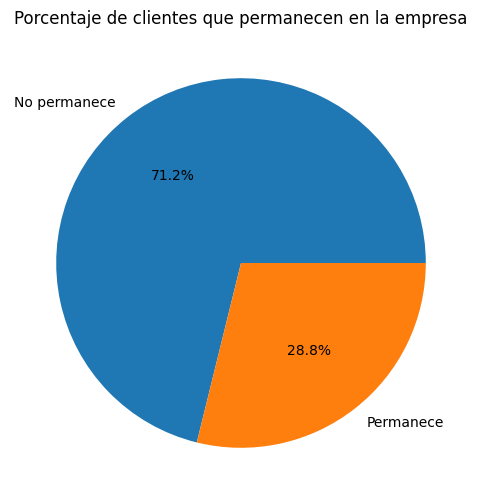

En el primer gr√°fico realizado se pudo observar el porentaje exacto de clientes que abandonan la empresa, que es un 71.2%, esto coincide con lo analizado anteriormente con el an√°lisis descriptivo.

Se procede a analizar otras variables para tratar de hallar patrones por:
* G√©nero
* Tipo de contrato
* M√©todo de pago
* Total gastado
* Tiempo de contrato

### An√°lisis sobre la tasa de abandono por g√©nero

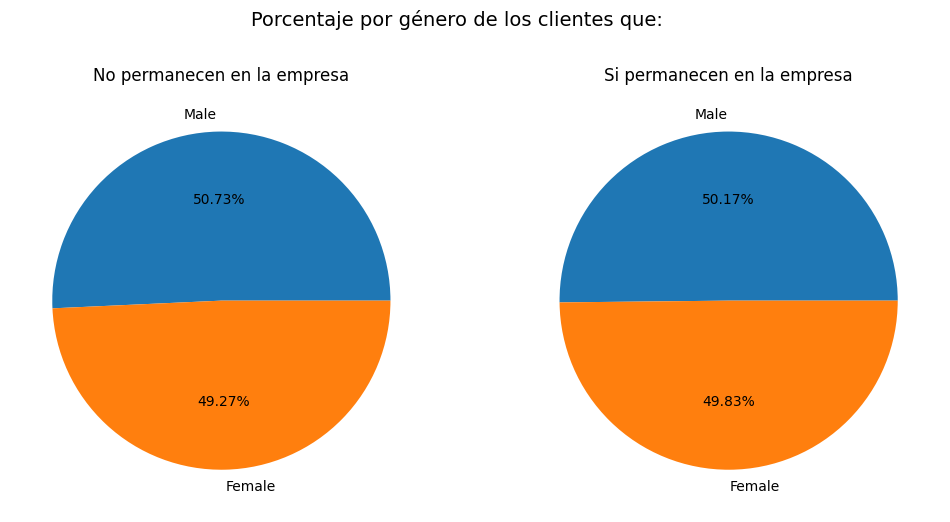

En el gr√°fico de la izquierda que representa la tasa de abandono, del total 71.2%, en realidad no hay una diferencia marcada entre hombres y mujeres, el 50.73% del total son hombres y el 49.27% son mujeres, por lo tanto no hay un patr√≥n visible en que el g√©nero afecte en la tasa de abandono.

El gr√°fico de la derecha muestra la tasa de permanencia que correspond√≠a al 28.8%, se puede ver que tampoco se hace una diferencia marcada entre el ser hombre o mujer.

Por lo tanto el g√©nero no hace diferencia entre el abandono o permanencia en la empresa.

### An√°lisis sobre la tasa de abandono por tipo de contrato

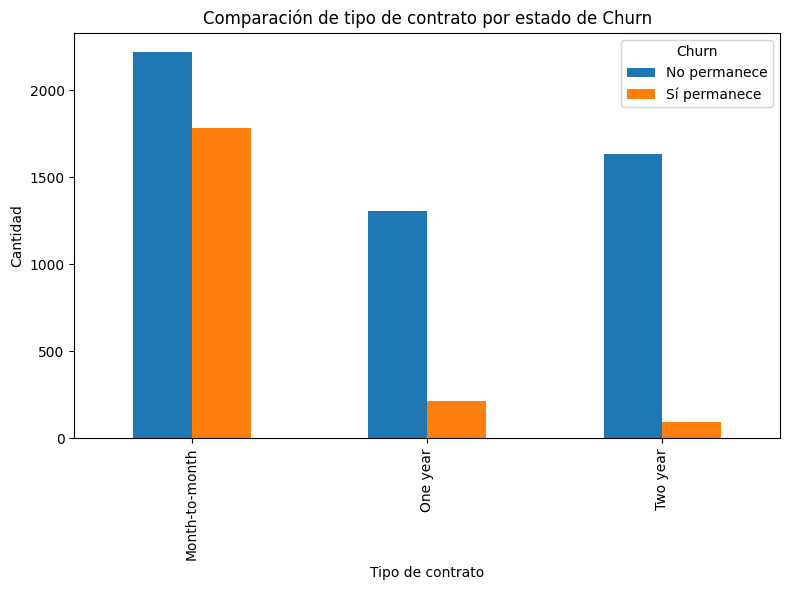

En este gr√°fico se puede observar que en los tipos de contrato siempre predomina la tasa de abanodno, lo cual es esperado ya que el abandono representa m√°s del 70% de los datos.

Adem√°s de esto, es importante resaltar que en el tipo de contrato ```Month-to-month``` (mes a mes) es la √∫nica que posee una cantidad considerablemente alta de clientes que permanecen, por lo que se podr√≠a decir que es la opci√≥n favorita de la mayor√≠a que ha decidiso quedarse.

### An√°lisis sobre la tasa de abandono por m√©todo de pago

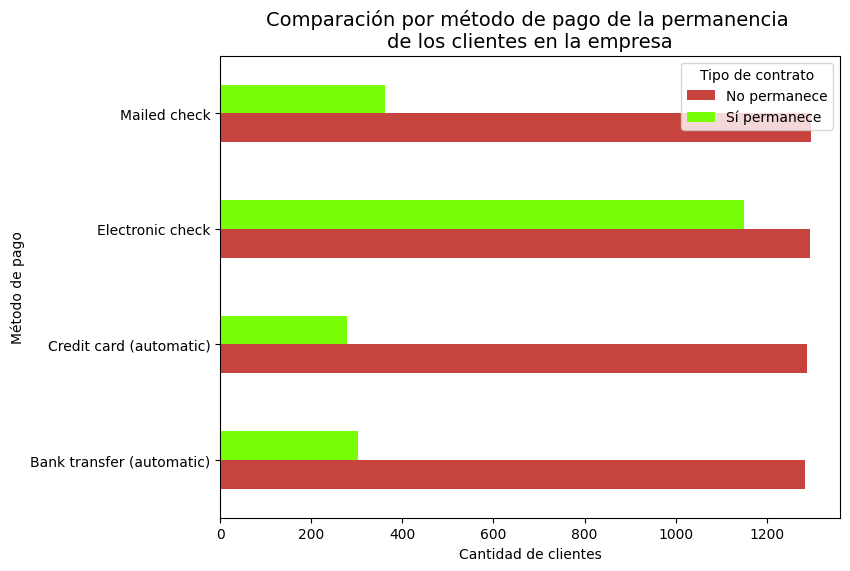

Sobre el gr√°fico se observa que realmente no hay una diferencia marcada para los que abandonan la empresa entre los m√©todos de pago, pero para quienes si se han quedado el m√°s popular ha sido ```Electronik check``` seguido de lejos por ```Mailed check```. Por lo que esto podr√≠a ser una base para la reestructuraci√≥n de los servicios

### An√°lisis sobre tasa de abandono por total pagado

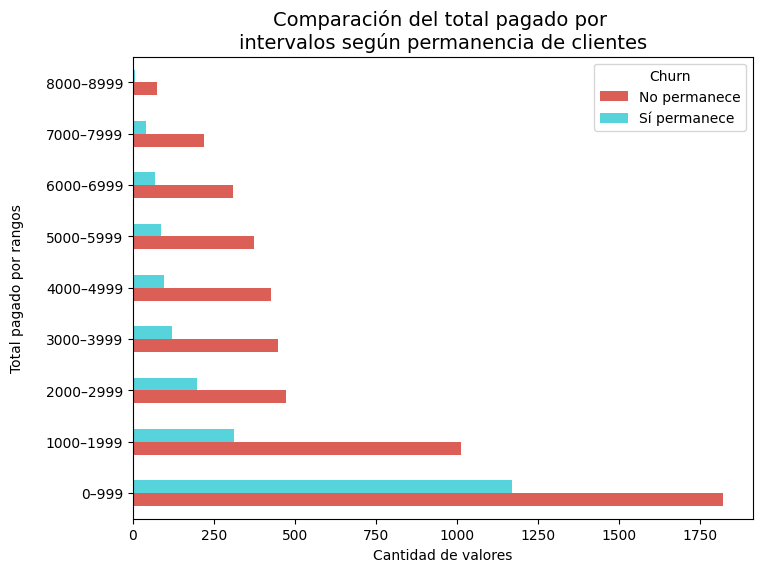

En este caso se puede observar que la tasa de abandono es mayor cuando el total pagado en menor a $1000, esto es coherente con el CV tan alto del 99.47% que observamos para el "Total", ya que indica que la mayor√≠a de los clientes tienen un gasto total bajo mientras que unos pocos se extienden a rangos de gasto mucho m√°s altos, siendo los que "mantienen" la empresa.

Por otra analizando los que permanecen tambi√©n va disminuyendo conforme aumenta el total pagado, es decir que hay muchos que aunque hayan permancedido por cierto a√∫n as√≠ dejan la empresa y por eso las barras que representan la tasa de abandono siempre son m√°s largas que las que representan a los que se quedan.

### An√°lisis sobre la tasa de abandono por meses de contrato

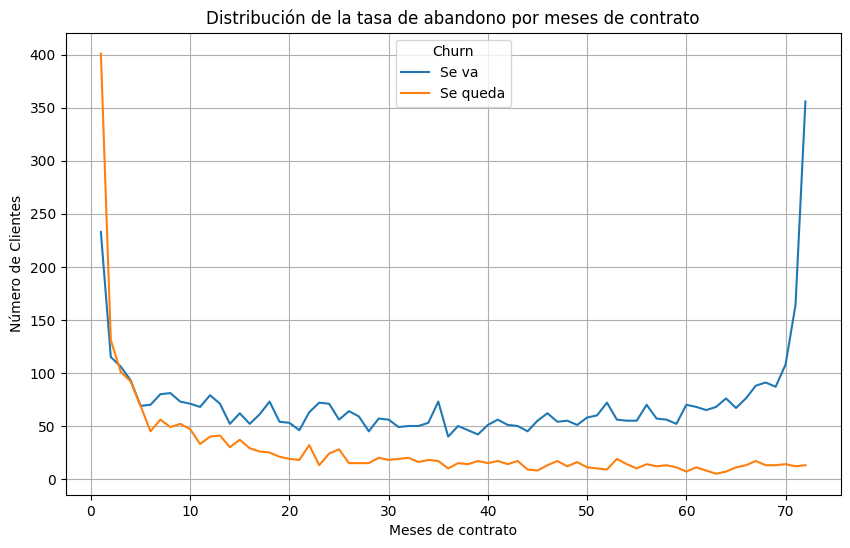

En este gr√°fico se puede observar lo mismo que en el anterior, que al inicio hay mucho abandono, de hecho la gr√°fica de l√≠nea anaranjada va tendiendo hacia abajo entre m√°s tiempo ha pasado, por otra parte en la l√≠nea azul de tasa de abandono, denota una tendencia horizontal durante los meses intermedios, es decir que var√≠a levemente hacia arriba o hacia abajo, lo que hace que se mantenga casi siempre en rangos similares, implicando que cada mes se van cantidades de clientes similares. 

Es importante destacar que durante los primeros 5 meses y los 65 √∫ltimos meses donde se denota un aumento considerable de abandono. Esto sugiere que, por un lado, una proporci√≥n significativa de clientes nuevos o con contratos de corta duraci√≥n optan por abandonar despu√©s de un per√≠odo inicial. Por otro lado, los clientes de mayor antig√ºedad o con contratos m√°s largos tambi√©n tienden a abandonar cuando finalizan sus ciclos de servicio extendidos, lo que contribuye al aumento del churn en la cola de la distribuci√≥n.

## 5.4 Conclusiones e Insights